In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [49]:
X = load_boston().data
Y = load_boston().target

In [50]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [173]:
clf = SGDRegressor(n_iter=1000)
clf.fit(X, Y)
print(mean_squared_error(Y, clf.predict(X)))

21.902843787689253


c:\users\rites\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


<h2>Custom SGD Regressor</h2>

In [174]:
class MySGD:
    def __init__(self):
        self.weight_vect = list() # This weight vector is accessible to all methods of a particular instance of class.
    
    def predict_yi(self,X_i):
        Y_i = self.weight_vect[0]   # Initializing Y_i with W[0]. Here W[0] is b0 of the equation Yi = b0 + b1*x1 + .....+bn*xn
        #print(X_i.shape)
        for i in range(len(X_i)):
            Y_i += X_i[i]*self.weight_vect[i+1]   # Yi = b0 + b1*x1 + .....+bn*xn  
        return Y_i
    
    
    def fit(self,X_train,Y,n_iter=1000,lrn_rate=0.001):
        W = np.zeros(len(X_train[0])+1) # Initilalizing Weight vectors with length n+1 as coefficients are from b0 to bn.
        self.weight_vect = W
        #print("In fit method",len(seW))
        for k in range(n_iter):
            sum_error = 0
            i=0
            for row in X_train:
                error = self.predict_yi(row)-Y[i]
                #print(error)
                i += 1
                sum_error += error**2  # storing squared error to understand the improvement of model. 
                W[0] = W[0] - 2*lrn_rate*error  # Updating coefficient b0
                for j in range(len(row)):
                    W[j+1] = W[j+1] -2*lrn_rate*error*row[j]  # Updating Weight vector 
            self.weight_vect = W
            
    def predict(self,X_i):
        Y1 = []
        for row in X_i:
            Y1.append(self.predict_yi(row))
        return Y1

In [175]:
# Training my custom model 
model = MySGD()
model.fit(X,Y)

<h3>MSE of custom and sklearn's SGD</h3>

In [176]:
print("MSE of Custom SGD",mean_squared_error(Y,model.predict(X)))
print("MSE of Sklearn's SGD",mean_squared_error(Y,clf.predict(X)))

MSE of Custom SGD 22.34230911750648
MSE of Sklearn's SGD 21.902843787689253


<h3>Chart of Actual Yi Vs Custom SGD Predicted Yi</h3>

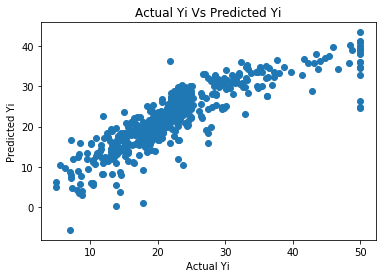

In [177]:
import matplotlib.pyplot as plt
plt.scatter(Y,model.predict(X))
plt.title("Actual Yi Vs Predicted Yi")
plt.xlabel("Actual Yi")
plt.ylabel("Predicted Yi")
plt.show()

<h3>Chart of Actual Yi Vs Sklearn's SGD Predicted Yi</h3>

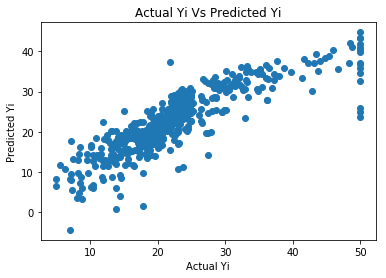

In [178]:
plt.scatter(Y,clf.predict(X))
plt.title("Actual Yi Vs Predicted Yi")
plt.xlabel("Actual Yi")
plt.ylabel("Predicted Yi")
plt.show()

<h3>Compairing weights of Custom SGD with Sklearn's SGD</h3>

In [179]:
from prettytable import PrettyTable

# Initializing table object
x = PrettyTable(['Features','weight of custom SGD','weight of sklearn SGD'])

# Getting weight of custom SGD
custom_lst  = []
for i in model.weight_vect[1:]: # model.weight_vect returns weight vectors of each feature
                                # be careful take weights from index 1 as bo is not weight of any feature
    custom_lst.append(i)
    
# Getting weight of sklearn's SGD
sklearn_lst  = []
for i in clf.coef_: # clf.coef_ returns weight vectors of each feature
    sklearn_lst.append(i)


# List containing features 
feat_lst = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13']
                 
# Combining all three lists to form a table
for i in range(len(feat_lst)):
    lst = []
    lst.append(feat_lst[i])
    lst.append(custom_lst[i])
    lst.append(sklearn_lst[i])
    x.add_row(lst)

print(x)

+----------+----------------------+-----------------------+
| Features | weight of custom SGD | weight of sklearn SGD |
+----------+----------------------+-----------------------+
|    f1    | -1.1415400509783526  |  -0.9288534041434803  |
|    f2    |  0.9280768640558514  |   1.0855180740541848  |
|    f3    | 0.13713817112631482  |  0.12984315327069687  |
|    f4    |  0.8116259919404395  |   0.6732379012855269  |
|    f5    | -2.1008560668485896  |   -2.071016874038316  |
|    f6    |  2.1902426015148437  |   2.672083086014879   |
|    f7    | 0.11366874716565632  |  0.01620787179637586  |
|    f8    |  -2.929207337842744  |  -3.0989761960219626  |
|    f9    |  2.352415343181041   |   2.647401930512593   |
|   f10    | -1.7750918198969137  |  -2.0857086550012975  |
|   f11    | -1.9277983019473979  |   -2.069613449247915  |
|   f12    |  0.837471831628346   |   0.8670442325933713  |
|   f13    |  -4.100508708697415  |  -3.7568860822317447  |
+----------+----------------------+-----

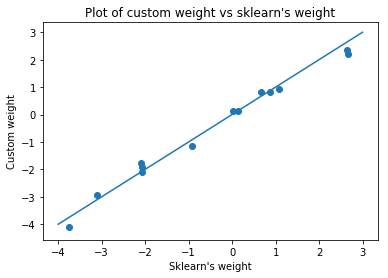

In [180]:
# printing a plot of custom weights vs sklearns's weight
x = [-4,-3,-2,-1,0,1,2,3]
plt.plot(x,x)
plt.scatter(sklearn_lst,custom_lst)
plt.title("Plot of custom weight vs sklearn's weight")
plt.xlabel("Sklearn's weight")
plt.ylabel("Custom weight")
plt.plot()
plt.show()

<h3>Observation</h3>

<h4>1.The weights returned by custom SGD is very close to weights returned by Sklearn SGD </h4>
<h4>2.In the plot above we can ssee that most of the points are very close to the straight line</h4>

<h3>MSE of custom SGD and sklearn's SGD</h3>

In [181]:
print("MSE of Custom SGD",mean_squared_error(Y,model.predict(X)))
print("**********************************************************")
print("MSE of Sklearn's SGD",mean_squared_error(Y,clf.predict(X)))

MSE of Custom SGD 22.34230911750648
**********************************************************
MSE of Sklearn's SGD 21.902843787689253


<h3>Conclusion</h3>

<h4>1. The plot of custom SGD predicted yi vs actual yi and of sklearn SGD predicted yi vs actual yi are almost similar.</h4>
<h4>2. The weights returned by custom SGD and sklearn SGD are very close as can be seen in the plot. Most of the points are very close to the dtraight line.</h4>
<h4>3. The MSE of custom SGD and sklearn SGD are very close . To be precise custom SGD's MSE is slightly less than that of sklearn SGD.</h4>